In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [279]:
# import dataset
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [281]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [282]:
data2.head()

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [283]:
data1[data1.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [284]:
data1.isnull().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

In [285]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


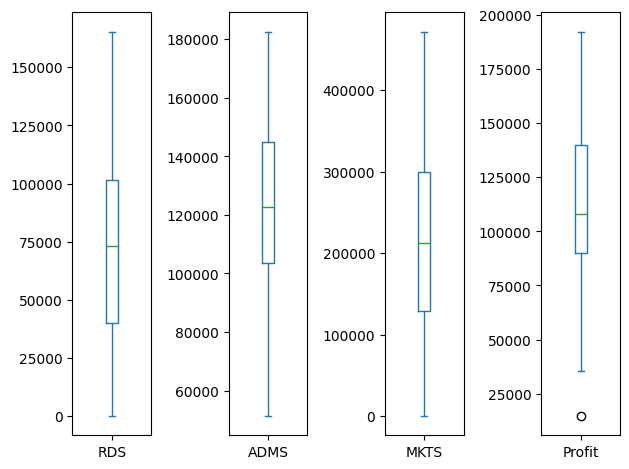

In [286]:
data1.plot(kind='box', subplots=True)
plt.tight_layout();

Text(0.5, 1.0, 'Marketing Spend-No transformation')

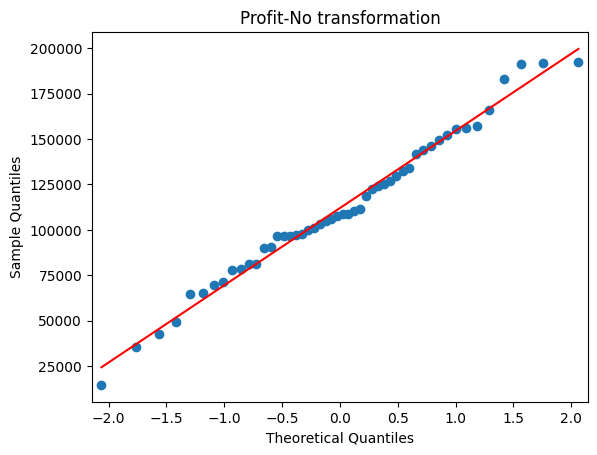

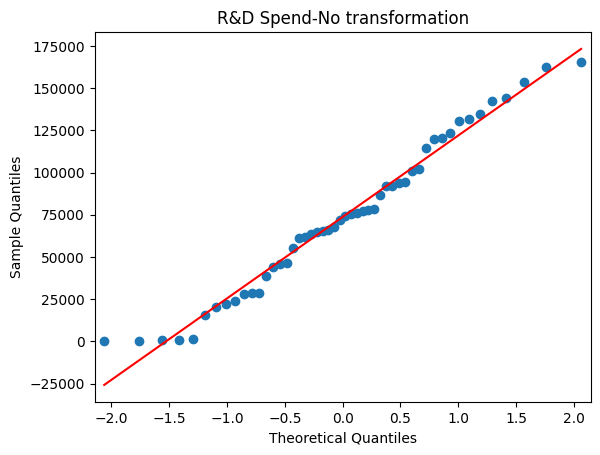

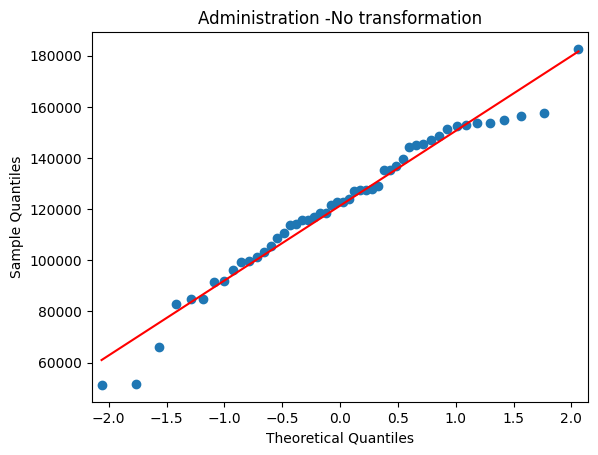

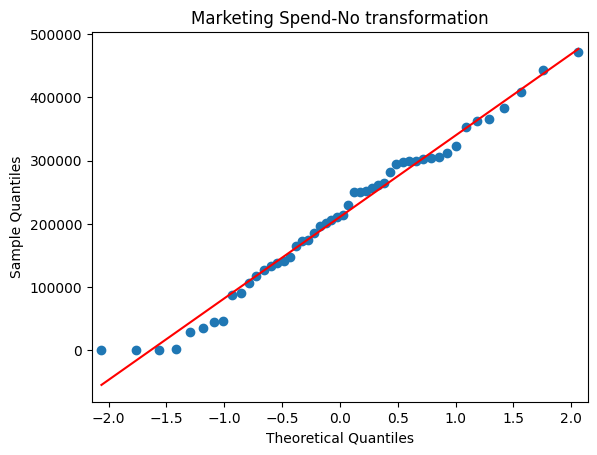

In [287]:
#Exploratory Data Anlaysis
#Visualizing the Distribution of Independent Features with the help of Histograms
qqplot(data1['Profit'], line = 'r')
plt.title('Profit-No transformation')
qqplot(data1['RDS'], line = 'r')
plt.title('R&D Spend-No transformation')
qqplot(data1['ADMS'], line = 'r')
plt.title('Administration -No transformation')
qqplot(data1['MKTS'], line = 'r')
plt.title('Marketing Spend-No transformation')


Text(0.5, 1.0, 'Marketing Spend-Square root transformation')

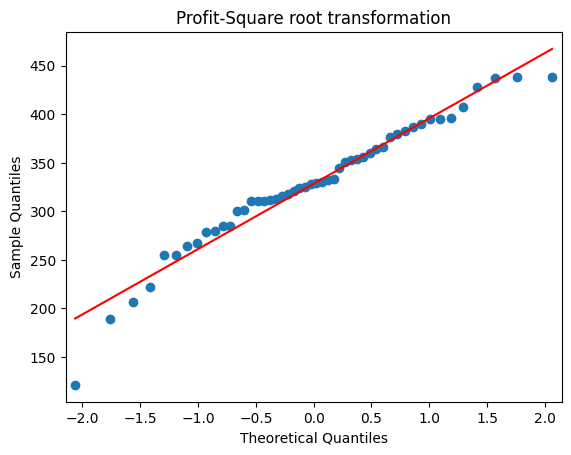

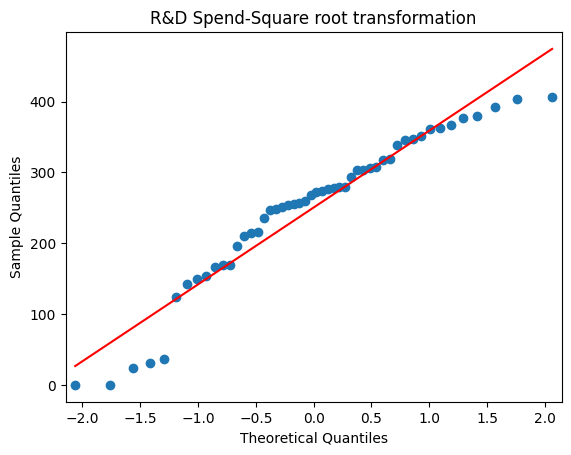

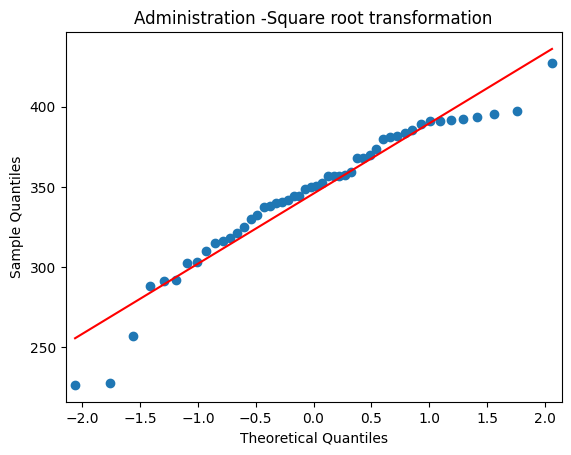

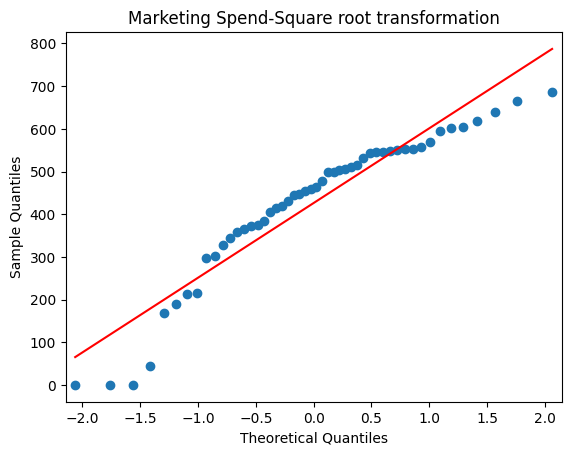

In [288]:
#Square root transformation and visualizing the Histogram to determine any possible changes in distribution
qqplot(np.sqrt(data1['Profit']), line = 'r')
plt.title('Profit-Square root transformation')
qqplot(np.sqrt(data1['RDS']), line = 'r')
plt.title('R&D Spend-Square root transformation')
qqplot(np.sqrt(data1['ADMS']), line = 'r')
plt.title('Administration -Square root transformation')
qqplot(np.sqrt(data1['MKTS']), line = 'r')
plt.title('Marketing Spend-Square root transformation')


c:\Users\astik\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Marketing Spend-Log transformation')

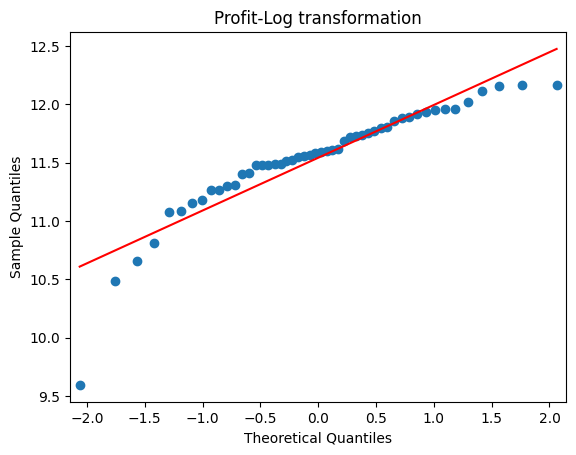

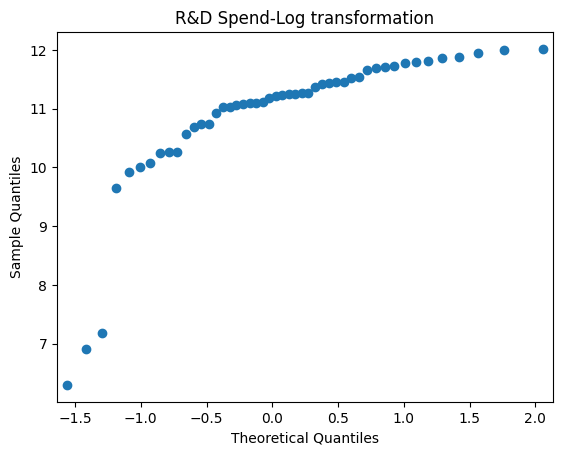

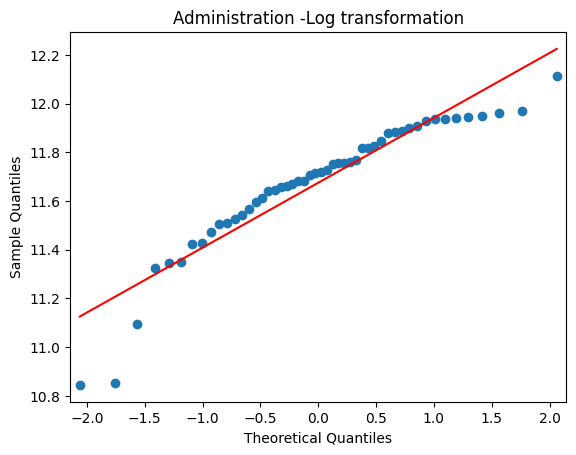

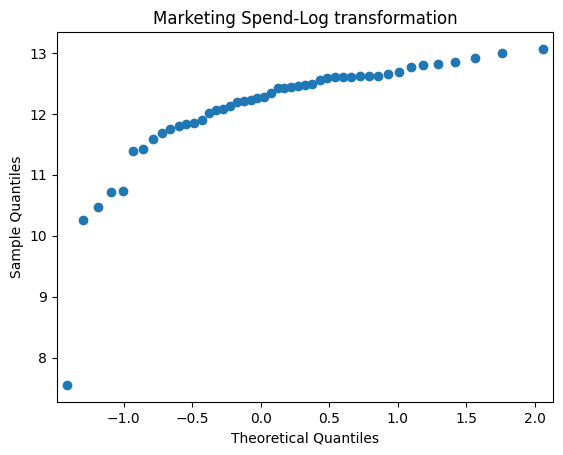

In [289]:
qqplot(np.log(data1['Profit']), line = 'r')
plt.title('Profit-Log transformation')
qqplot(np.log(data1['RDS']), line = 'r')
plt.title('R&D Spend-Log transformation')
qqplot(np.log(data1['ADMS']), line = 'r')
plt.title('Administration -Log transformation')
qqplot(np.log(data1['MKTS']), line = 'r')
plt.title('Marketing Spend-Log transformation')

Text(0.5, 1.0, 'Marketing Spend-cube root transformation')

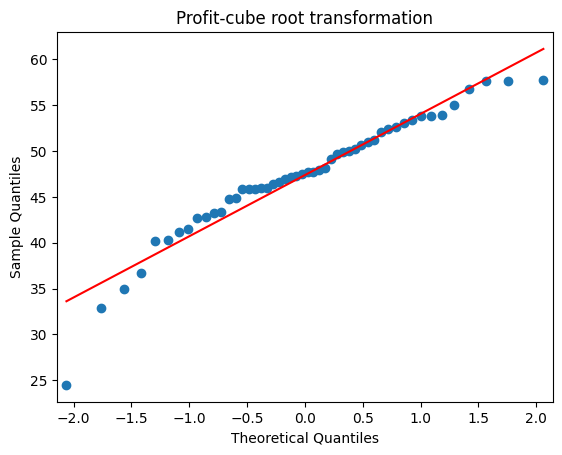

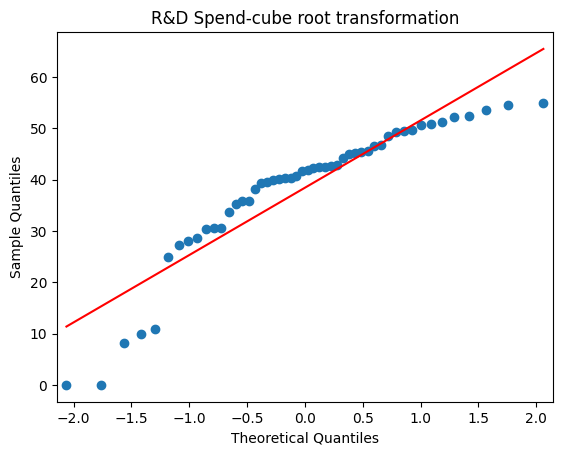

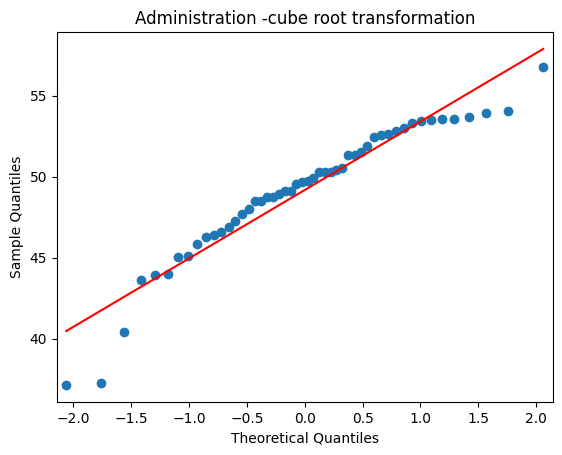

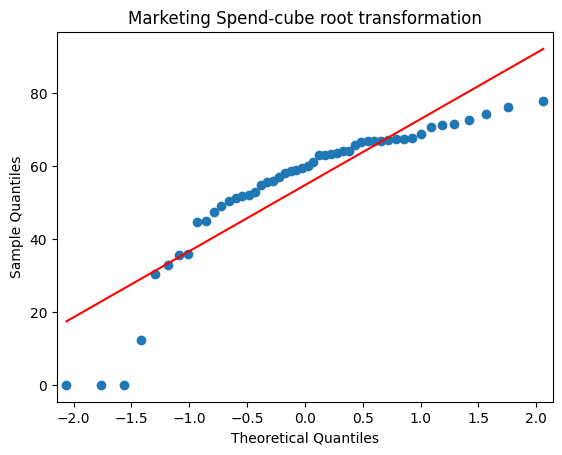

In [290]:
#Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution
qqplot(np.cbrt(data1['Profit']), line = 'r')
plt.title('Profit-cube root transformation')
qqplot(np.cbrt(data1['RDS']), line = 'r')
plt.title('R&D Spend-cube root transformation')
qqplot(np.cbrt(data1['ADMS']), line = 'r')
plt.title('Administration -cube root transformation')
qqplot(np.cbrt(data1['MKTS']), line = 'r')
plt.title('Marketing Spend-cube root transformation')

In [291]:
datacorr=data1.corr()
datacorr

C:\Users\astik\AppData\Local\Temp\ipykernel_11164\1008188631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacorr=data1.corr()


,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


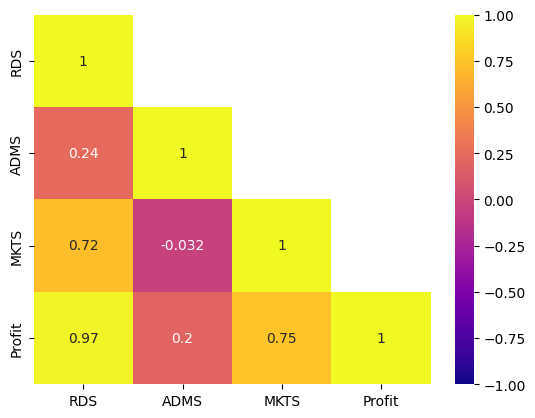

In [292]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(datacorr, 
            annot=True,
            mask=np.triu(datacorr,1),
            vmin=-1,
            vmax=1,
            cmap='plasma');

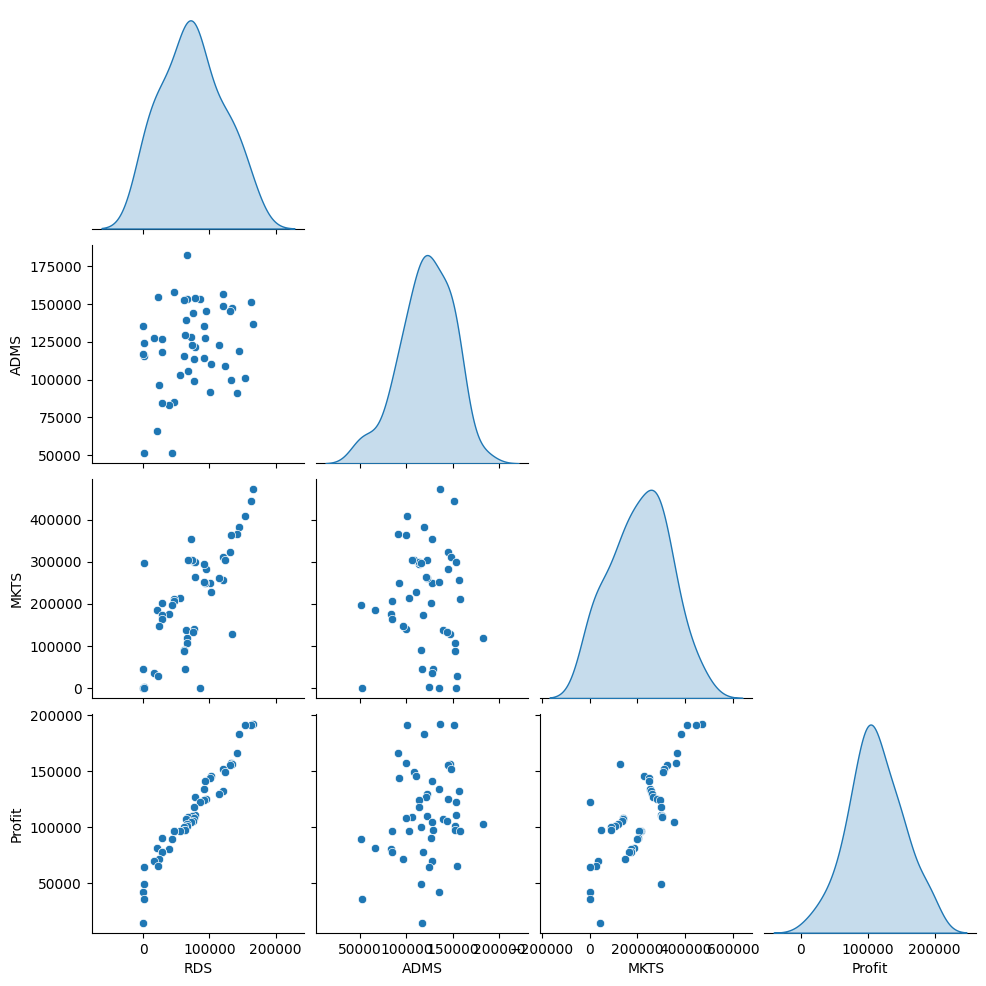

In [293]:
# pairplot
sns.pairplot(data1,
            corner=True,
            diag_kind='kde');
            

In [294]:
# build a multiple linear regression model using statsmodels library & print its summary
from statsmodels.formula.api import ols
formula = 'Profit~RDS+ADMS+MKTS'
model = ols(formula=formula, data=data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        20:16:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

In [295]:
# Simple Linear Regression with each independent feature vs the target feature 
# Profit vs ADMS
formula2 = 'Profit ~ ADMS'
ADMSmodel = ols(formula=formula2, data=data1).fit()
print(ADMSmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 01 Dec 2022   Prob (F-statistic):              0.162
Time:                        20:16:57   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.0

In [296]:
# Profit vs MKTS
formula3 = 'Profit ~ MKTS'
MKTSmodel = ols(formula=formula3, data=data1).fit()
print(MKTSmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           4.38e-10
Time:                        20:16:57   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.0

In [297]:
#Multiple Linear Regression with `Profit` & `ADMS` vs `MKTS`
formula4 = 'Profit~ADMS+MKTS'
Profitmodel = ols(formula=formula4, data=data1).fit()
print(Profitmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.50e-10
Time:                        20:16:57   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.2

In [298]:
str(data1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADMS    50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [299]:
data2=data1
data2.head()
data2.drop(['State'],axis=1,inplace=True)

In [300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] =( [variance_inflation_factor((data2).values, i) for i in range(data2.shape[1])])
vif['features'] = data2.columns
vif.round(1)
vif

,VIF Factor,features
0,30.156046,RDS
1,13.396558,ADMS
2,9.845142,MKTS
3,79.627990,Profit


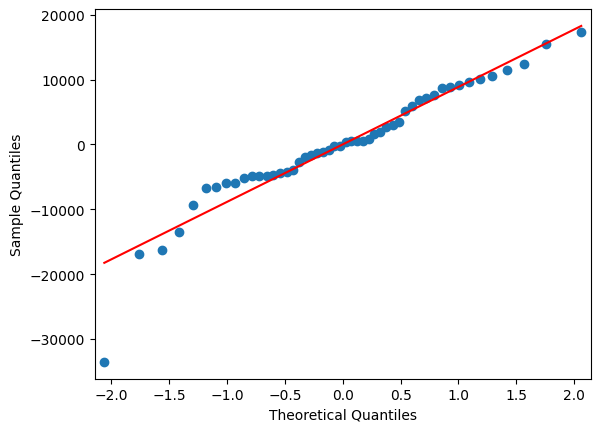

In [301]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation
#Residual Analysis
# check for the normality of the residuals - qqplot
from statsmodels.api import qqplot
qqplot(model.resid, line='s');

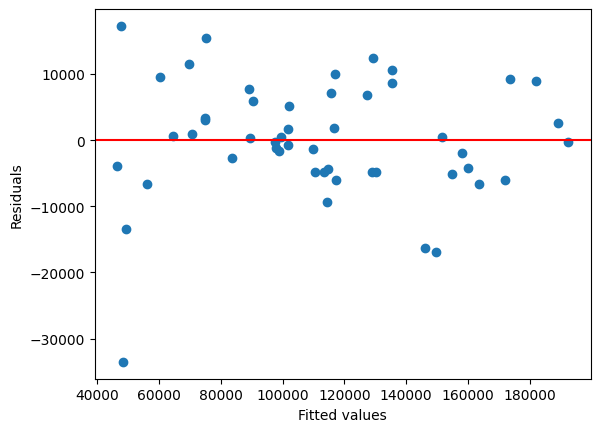

In [302]:
# check for homoscedasticity - residuals vs fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-');

eval_env: 1


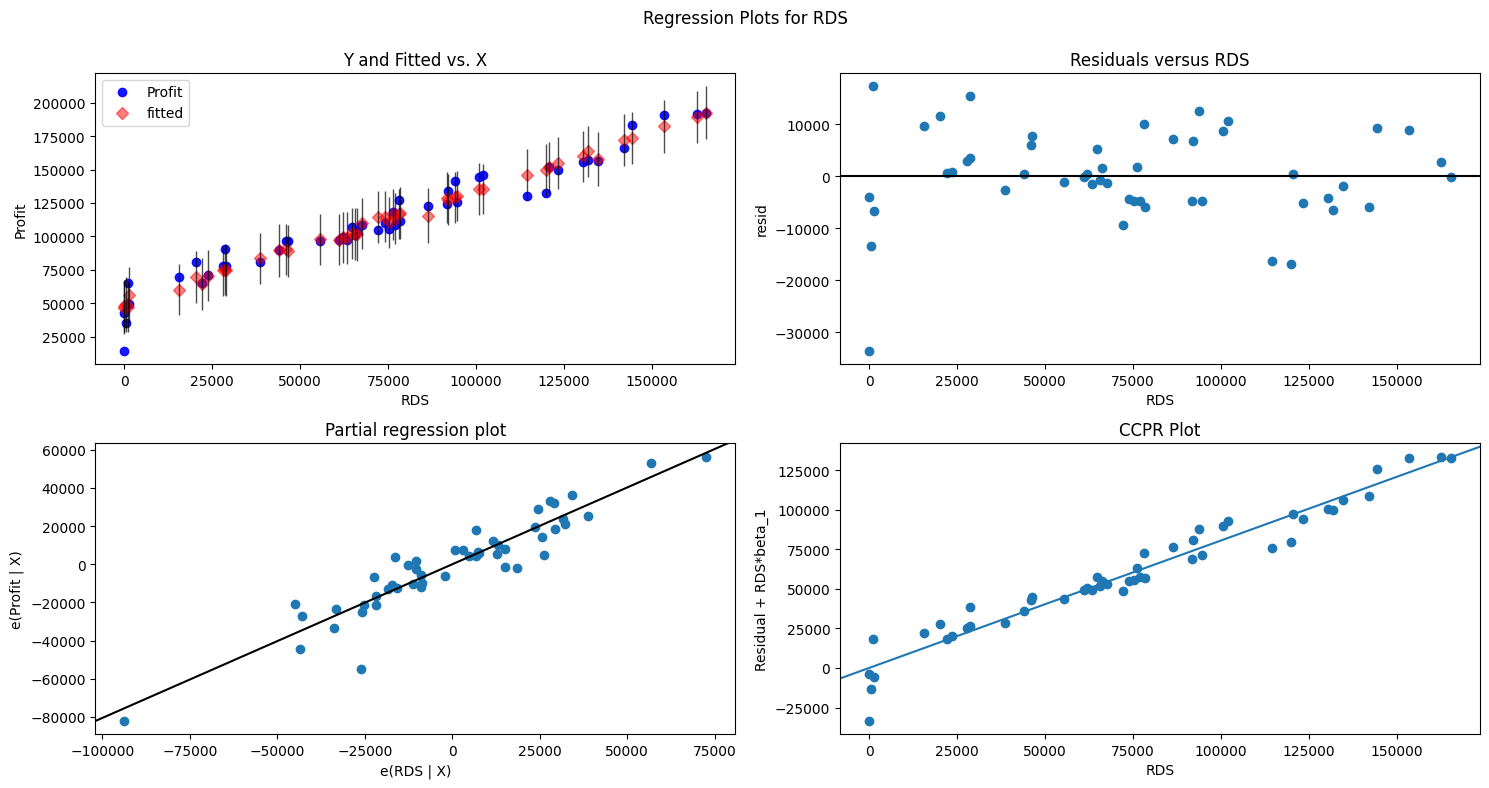

In [303]:
#Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


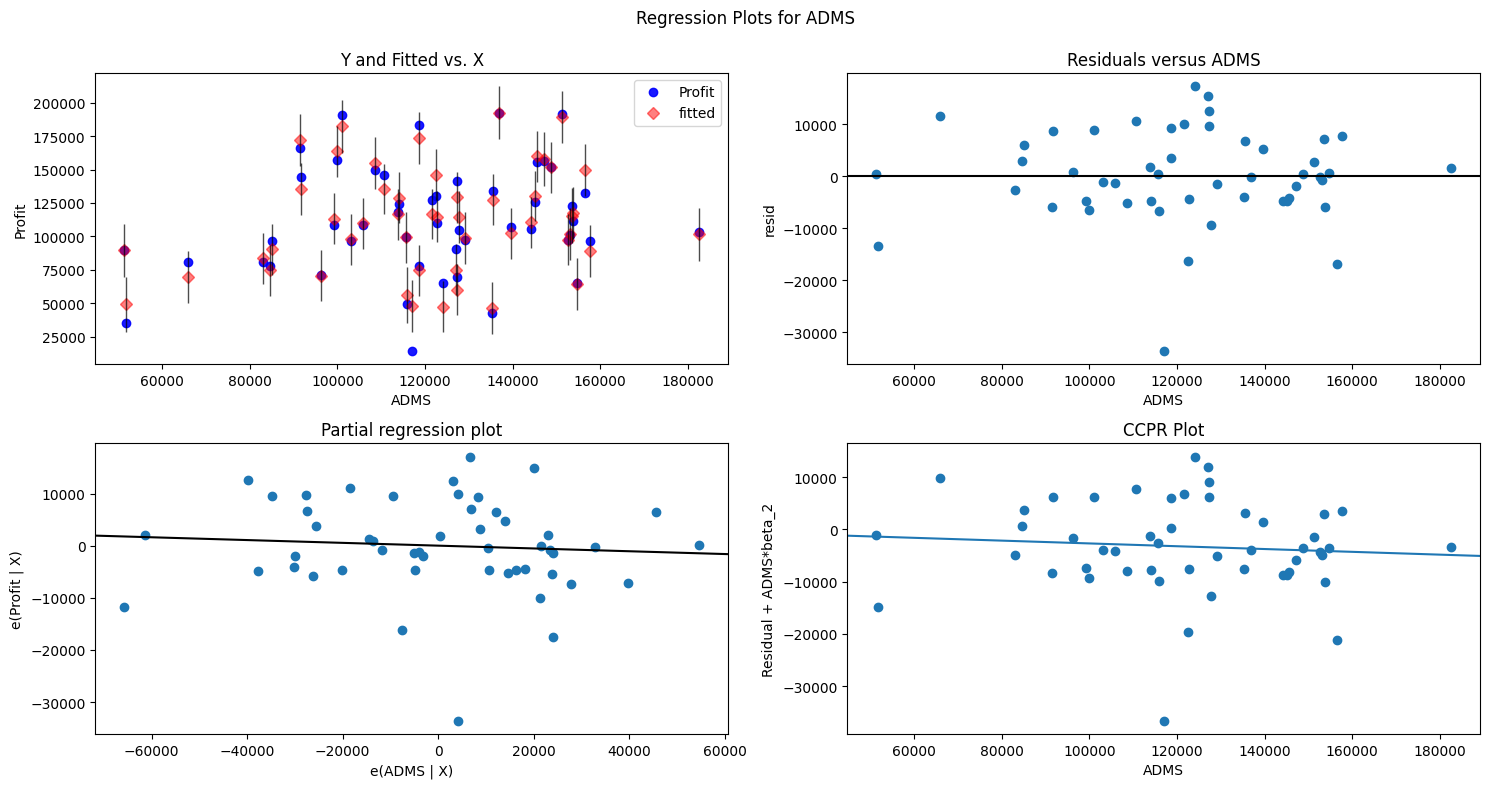

In [304]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


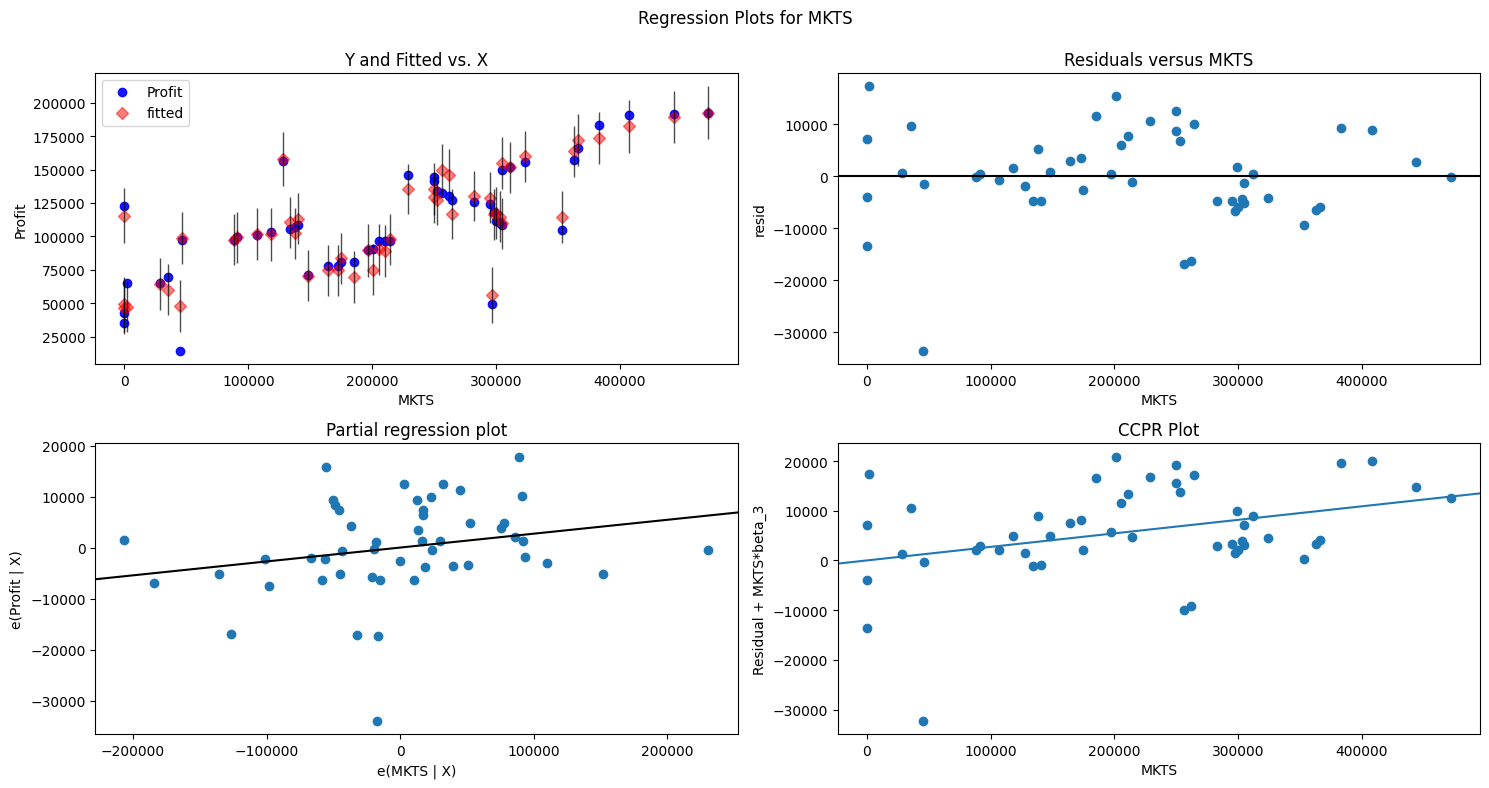

In [305]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

In [306]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

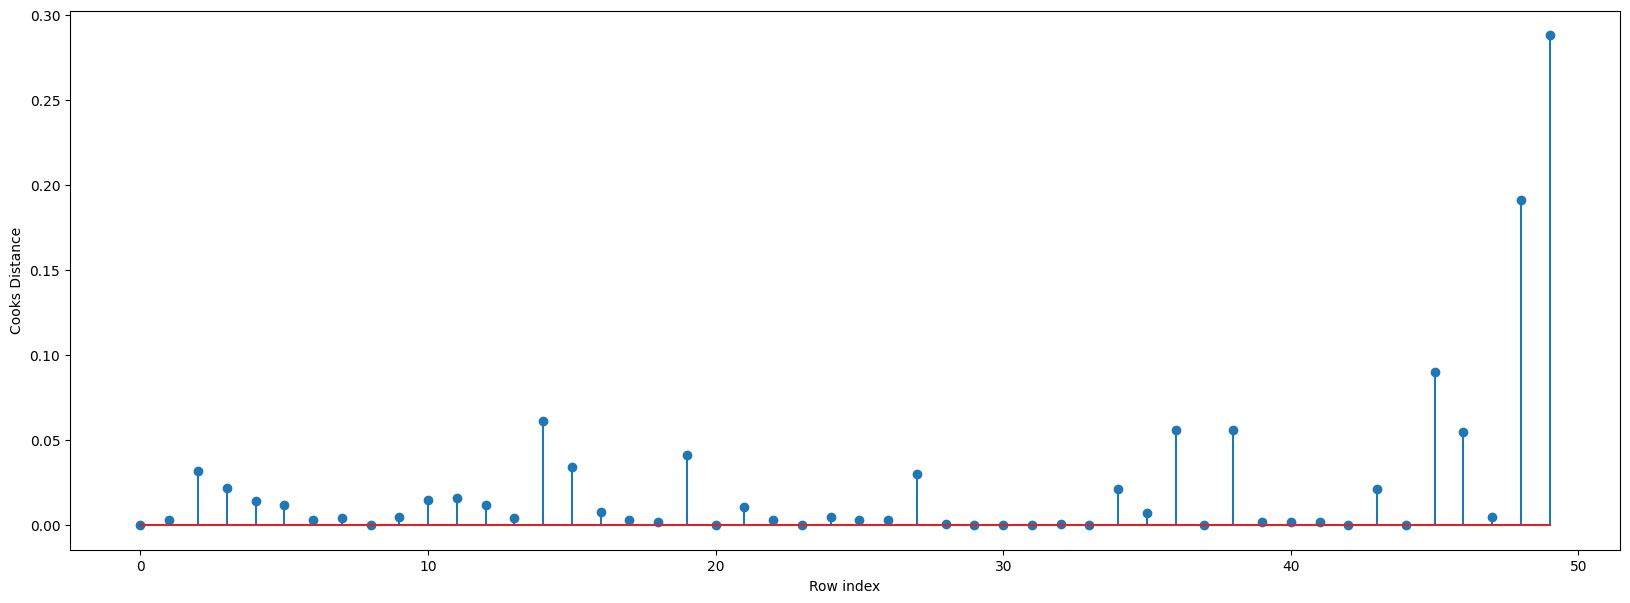

In [307]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [308]:
cgreater = c>0.05
cgreater

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True, False,  True,  True])

In [309]:
# get the index of elements of cgreater where cgreater is True
idx_drop = np.where(cgreater)
idx_drop

(array([14, 36, 38, 45, 46, 48, 49], dtype=int64),)

In [310]:
idx_drop[0]

array([14, 36, 38, 45, 46, 48, 49], dtype=int64)

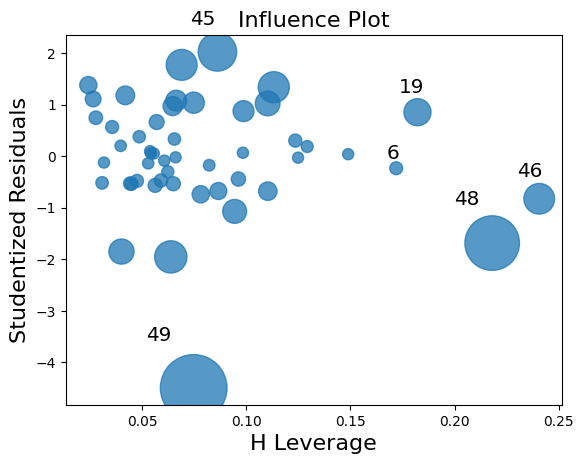

In [311]:
# influence plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model);

In [312]:
data3=data2
data3 = data3.drop(idx_drop[0],axis=0).reset_index(drop=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     43 non-null     float64
 1   ADMS    43 non-null     float64
 2   MKTS    43 non-null     float64
 3   Profit  43 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


In [313]:
final_formula = 'Profit~RDS+ADMS+MKTS'
finel_model = ols(formula=formula, data=data3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        20:17:01   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

In [314]:
model_influence = finel_model.get_influence()
(c1,_) = model_influence.cooks_distance
c1

array([4.98482263e-04, 1.63140681e-02, 7.84221226e-02, 5.26852485e-02,
       3.66871633e-02, 2.71549389e-02, 2.48962314e-02, 8.79375426e-03,
       1.37973192e-04, 1.28576532e-02, 3.17718323e-02, 3.50016998e-02,
       2.41708380e-02, 8.64614272e-03, 8.33144538e-02, 2.11410718e-02,
       8.97283603e-03, 5.74231648e-03, 6.28567242e-02, 1.03431713e-03,
       3.15697710e-02, 8.82458686e-03, 1.03803847e-03, 2.46778727e-02,
       4.81554943e-03, 1.18955178e-02, 8.87686273e-02, 1.04429422e-03,
       1.69697328e-03, 5.40804190e-04, 1.05104202e-03, 8.44587209e-03,
       1.15434521e-03, 6.26922641e-02, 1.65730469e-02, 1.98538947e-03,
       1.11280770e-02, 4.05771220e-03, 2.90619726e-03, 4.24991536e-05,
       4.40363522e-02, 6.49083604e-04, 3.34064705e-02])

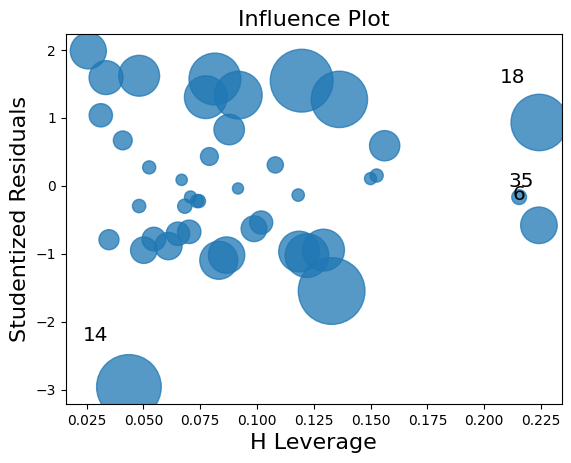

In [315]:
influence_plot(finel_model);

In [316]:
#Row data model Rsquared
model.rsquared

0.9507459940683246

In [317]:
#finel model Rsquared 
finel_model.rsquared 

0.9708289815598962